In [2]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pylab
import statsmodels.api as sm
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import pingouin as pg
import statsmodels.stats.api as sms
import pylab
from statsmodels.formula.api import ols
from sklearn import metrics
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.tsaplots import plot_acf

/Users/shaheerhassan/opt/anaconda3/envs/Stats/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Collect Data & Cleanup

In [3]:
#All Functions Created for Program 
def analysis_options(x): 
    for item in range(len(x)):
        input_v = 'Do you want to analyze? (Y/N) %s' % (x[item])
        u_input = input(input_v)
        
        if u_input == "Y":
            analysis_req.append(x[item]) 
    return analysis_req

def pick_car(options):
    print("Please choose your car:")

    for idx, element in enumerate(options):
        print("{}) {}".format(idx + 1, element))

    i = input("Enter number: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i) - 1
    except:
        pass
    return None

def pick_track(options):
    print("Please choose your track:")

    for idx, element in enumerate(options):
        print("{}) {}".format(idx + 1, element))

    i = input("Enter number: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i) - 1
    except:
        pass
    return None

def write_data(choosen_car, choosen_track, data_frame):
    car = choosen_car
    track = choosen_track
    rtype = choosen_rtype
    path_to_file = '%s_%s_%s_dataset.csv' % (car, track, rtype)
    path = Path(path_to_file)
    data_frame.to_csv(path_to_file, mode='a', index=False, header=True)
    return None 
    
def add_data_question(options):
    print("Do you want to add more data or build your model?")

    for idx, element in enumerate(options):
        print("{}) {}".format(idx + 1, element))

    i = input("Enter number: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i) - 1
    except:
        pass
    return None

def start_question(options):
    print("What do you want to do?")
    for idx, element in enumerate(options):
        print("{}) {}".format(idx + 1, element))

    i = input("Enter number: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i) - 1
    except:
        pass
    return None

def write_to_data(choosen_car1, choosen_track1, data_frame1):
    car1 = choosen_car1
    track1 = choosen_track1
    rtype1 = choosen_rtype1
    path_to_file1 = '%s_%s_%s_dataset.csv' % (car1, track1, rtype1)
    path1 = Path(path_to_file1)
    data_frame1.to_csv(path_to_file1, mode='a', index=False, header=False)
    return None 

def race_type(options):
    print("Race Type:")
    for idx, element in enumerate(options):
        print("{}) {}".format(idx + 1, element))

    i = input("Enter number: ")
    try:
        if 0 < int(i) <= len(options):
            return int(i) - 1
    except:
        pass
    return None


In [4]:
#All the options 

options1 = ["Red Bull", "Mercedes", "Ferrari", "Mclaren", "Alpine", "Alfa Romeo", "Alpha Tauri", "Haas", "Aston Martin", "Williams"]
options2 = ["Austria", "Portimao"]
options3 = ["Lap Time", "Track", "Rear Wing Setup", "Front Wing Setup"]
options4 = ["Add Data", "Build Model"]
options5 = ["Add to Exisiting Data", "Add New Data", "View Models"]
options6 = ["Time Trial", "FP's", "Quali", "Race"]

In [5]:
#starting question 

sq = start_question(options5)
choosen_start = options5[sq]

What do you want to do?
1) Add to Exisiting Data
2) Add New Data
3) View Models
Enter number: 3


In [6]:
if choosen_start == "Add New Data": 
    #pick car for analysis 
    res = pick_car(options1)
    choosen_car = options1[res]
    
    #pick track for analysis 
    res2 = pick_track(options2)
    choosen_track = options2[res2]
    
    #pick race type 
    res3 = race_type(options6)
    choosen_rtype = options6[res3]
    
    #choose what stats you want to analyze?

    analysis_req = ["lapIndex", "carId"]
    analysis_options(options3)

    
    analysis_dict = {"Lap Time": "lap_time", "Front Wing Setup": "wing_setup_0", "Rear Wing Setup": "wing_setup_1", "Track": "trackId"}

    for index, data in enumerate(analysis_req):
        for key, value in analysis_dict.items():
            if key in data: 
                analysis_req[index] = data.replace(key, analysis_dict[key])
    filename = askopenfilename() 
    df = pd.read_csv(filename, "\t")
    lap_times1 = df.loc[(df["lapIndex"] > 0) & (df["binIndex"] == df["trackLength"] - 1), analysis_req]

    write_data(choosen_car, choosen_track, lap_times1)

elif choosen_start == "Add to Existing Data": 
    #pick car for analysis 
    res11 = pick_car(options1)
    choosen_car1 = options1[res11]
    
    #pick track for analysis 
    res22 = pick_track(options2)
    choosen_track2 = options2[res22]
    
    #pick race type 
    resAG = race_type(options6)
    choosen_rtype1 = options6[resAG]
    
    #choose what stats you want to analyze?

    analysis_req = ["lapIndex", "carId"]
    analysis_options(options3)
    
    analysis_dict = {"Lap Time": "lap_time", "Front Wing Setup": "wing_setup_0", "Rear Wing Setup": "wing_setup_1", "Track": "trackId"}

    for index, data in enumerate(analysis_req):
        for key, value in analysis_dict.items():
            if key in data: 
                analysis_req[index] = data.replace(key, analysis_dict[key])
    filename2 = askopenfilename() 
    df2 = pd.read_csv(filename2, "\t")
    lap_times2 = df2.loc[(df2["lapIndex"] > 0) & (df2["binIndex"] == df2["trackLength"] - 1), analysis_req33]

    write_to_data(choosen_car1, choosen_track2, lap_times2)
    
elif choosen_start == "View Models":
    #pick car for analysis 
    res111 = pick_car(options1)
    choosen_car111 = options1[res111]
    
    #pick track for analysis 
    res222 = pick_track(options2)
    choosen_track22 = options2[res222]
    
    #choose what stats you want to analyze?

    analysis_req = ["lapIndex", "carId"]
    analysis_options(options3)
    
    #pick race type 
    resAG2 = race_type(options6)
    choosen_rtype1 = options6[resAG2]
    
    analysis_dict = {"Lap Time": "lap_time", "Front Wing Setup": "wing_setup_0", "Rear Wing Setup": "wing_setup_1", "Track": "trackId"}

    for index, data in enumerate(analysis_req):
        for key, value in analysis_dict.items():
            if key in data: 
                analysis_req[index] = data.replace(key, analysis_dict[key])
    filename3 = askopenfilename() 
    df3 = pd.read_csv(filename3)

Please choose your car:
1) Red Bull
2) Mercedes
3) Ferrari
4) Mclaren
5) Alpine
6) Alfa Romeo
7) Alpha Tauri
8) Haas
9) Aston Martin
10) Williams
Enter number: 3
Please choose your track:
1) Austria
2) Portimao
Enter number: 2
Do you want to analyze? (Y/N) Lap TimeY
Do you want to analyze? (Y/N) TrackY
Do you want to analyze? (Y/N) Rear Wing SetupY
Do you want to analyze? (Y/N) Front Wing SetupY
Race Type:
1) Time Trial
2) FP's
3) Quali
4) Race
Enter number: 1


In [7]:
#add data or build model  
res4 = add_data_question(options4)
choosen_option = options4[res4]

Do you want to add more data or build your model?
1) Add Data
2) Build Model
Enter number: 2


In [8]:
if choosen_option == "Add Data": 
    #pick car for analysis 
    res111 = pick_car(options1)
    choosen_car111 = options1[res111]
    
    #pick track for analysis 
    res222 = pick_track(options2)
    choosen_track22 = options2[res222]
    
    #choose what stats you want to analyze?

    analysis_req = ["lapIndex", "carId"]
    analysis_options(options3)
    
    #pick race type 
    resAG2 = race_type(options6)
    choosen_rtype1 = options6[resAG2]
    
    analysis_dict = {"Lap Time": "lap_time", "Front Wing Setup": "wing_setup_0", "Rear Wing Setup": "wing_setup_1", "Track": "trackId"}

    for index, data in enumerate(analysis_req):
        for key, value in analysis_dict.items():
            if key in data: 
                analysis_req[index] = data.replace(key, analysis_dict[key])
    
    filename4 = askopenfilename() 
    df4 = pd.read_csv(filename4, "\t")
    lap_times3 = df4.loc[(df4["lapIndex"] > 0) & (df4["binIndex"] == df4["trackLength"] - 1), analysis_req]
    
    write_to_data(choosen_car111, choosen_track22, lap_times3)

In [9]:
#import updated dataset
filename5 = askopenfilename() 
df5 = pd.read_csv(filename5)

In [10]:
df5

,lapIndex,carId,lap_time,trackId,wing_setup_1,wing_setup_0
0,1,Ferrari,82.058,Portimao,8,7
1,2,Ferrari,81.085,Portimao,8,7
2,3,Ferrari,79.821,Portimao,8,7
3,4,Ferrari,80.874,Portimao,8,7
4,5,Ferrari,80.079,Portimao,8,7
5,6,Ferrari,79.793,Portimao,8,7
6,7,Ferrari,80.531,Portimao,8,7
7,8,Ferrari,80.772,Portimao,8,7
8,9,Ferrari,81.779,Portimao,8,7
9,1,Ferrari,82.151,Portimao,9,8


In [11]:
df6 = df5[df5.lap_time != -1]

In [12]:
df6

,lapIndex,carId,lap_time,trackId,wing_setup_1,wing_setup_0
0,1,Ferrari,82.058,Portimao,8,7
1,2,Ferrari,81.085,Portimao,8,7
2,3,Ferrari,79.821,Portimao,8,7
3,4,Ferrari,80.874,Portimao,8,7
4,5,Ferrari,80.079,Portimao,8,7
5,6,Ferrari,79.793,Portimao,8,7
6,7,Ferrari,80.531,Portimao,8,7
7,8,Ferrari,80.772,Portimao,8,7
8,9,Ferrari,81.779,Portimao,8,7
9,1,Ferrari,82.151,Portimao,9,8


## Visual Representation of Data

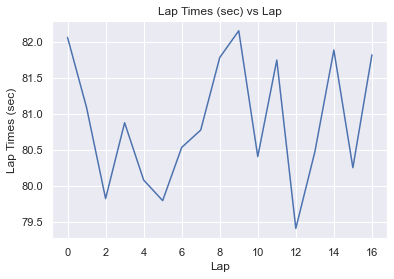

In [13]:
#view graph of lap times vs lap 

sns.set()
plt.plot(df6.index, df6['lap_time'])
plt.ylabel('Lap Times (sec)')
plt.xlabel('Lap')
plt.title('Lap Times (sec) vs Lap')
plt.savefig('LapTimes_%s.jpg' % choosen_track22, dpi=300, format='jpg', bbox_inches = 'tight')
plt.show()

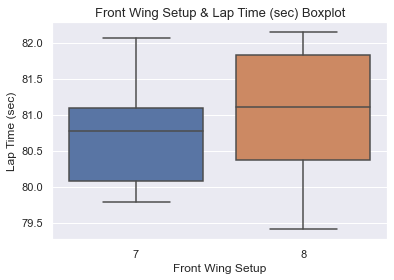

In [14]:
ax = sns.boxplot(x="wing_setup_0", y="lap_time", data=df6)
plt.xlabel('Front Wing Setup')
plt.ylabel('Lap Time (sec)')
plt.title('Front Wing Setup & Lap Time (sec) Boxplot', size=13)
plt.savefig('FW&LT Boxplot_%s.jpg' % choosen_track22, dpi=300, format='jpg', bbox_inches = 'tight')
plt.show()

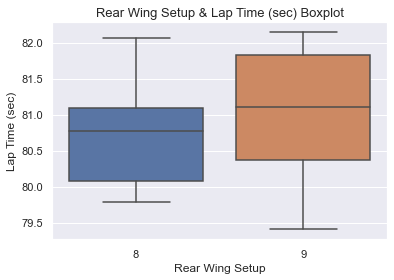

In [15]:
ax2 = sns.boxplot(x="wing_setup_1", y="lap_time", data=df6)
plt.xlabel('Rear Wing Setup')
plt.ylabel('Lap Time (sec)')
plt.title('Rear Wing Setup & Lap Time (sec) Boxplot', size=13)
plt.savefig('RW&LT Boxplot_%s.jpg' % choosen_track22, dpi=300, format='jpg', bbox_inches = 'tight')
plt.show()

In [26]:
describe_RW = df6.groupby(['wing_setup_1'])['lap_time'].describe()
describe_RW

,count,mean,std,min,25%,50%,75%,max
wing_setup_1,,,,,,,,
8,9.0,80.754667,0.804261,79.793,80.0790,80.7720,81.08500,82.058
9,8.0,81.015500,1.004226,79.407,80.3655,81.1065,81.83275,82.151


In [49]:
RW_summary = describe_RW.iloc[0,:]
RW_summary

count     9.000000
mean     80.754667
std       0.804261
min      79.793000
25%      80.079000
50%      80.772000
75%      81.085000
max      82.058000
Name: 8, dtype: float64

In [21]:
describe_FW = df6.groupby(['wing_setup_0'])['lap_time'].describe()
describe_FW

,count,mean,std,min,25%,50%,75%,max
wing_setup_0,,,,,,,,
7,9.0,80.754667,0.804261,79.793,80.0790,80.7720,81.08500,82.058
8,8.0,81.015500,1.004226,79.407,80.3655,81.1065,81.83275,82.151
